In [4]:
pip install selenium webdriver-manager


   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.5 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.5 MB 2.4 MB/s eta 0:00:04
   ----- ---------------------------------- 1.3/9.5 MB 2.6 MB/s eta 0:00:04
   ------- -------------------------------- 1.8/9.5 MB 2.4 MB/s eta 0:00:04
   --------- ------------------------------ 2.4/9.5 MB 2.5 MB/s eta 0:00:03
   ------------ --------------------------- 2.9/9.5 MB 2.4 MB/s eta 0:00:03
   ------------- -------------------------- 3.1/9.5 MB 2.3 MB/s eta 0:00:03
   --------------- ------------------------ 3.7/9.5 MB 2.3 MB/s eta 0:00:03
   ----------------- ---------------------- 4.2/9.5 MB 2.4 MB/s eta 0:00:03
   ------------------- -------------------- 4.7/9.5 MB 2.4 MB/s eta 0:00:03
   ----------------------- ---------------- 5.5/9.5 MB 2.4 MB/s eta 0:00:02
   ------------------------- -------------- 6.0/9.5 MB 2.5 MB/s eta 0:00:02
   -----------------------

In [2]:
import pandas as pd       
import numpy as np        
import matplotlib.pyplot as plt  
import seaborn as sns     
import re               
import json              


In [14]:
import json
import pandas as pd

with open("ubereats_restaurants_cleaned.json", "r", encoding="utf-8") as file:
    data = json.load(file)

df = pd.DataFrame(data)

def filter_cuisines(category_list):
    valid_cuisines = []
    for item in category_list:
        if not any(char.isdigit() for char in item) and "$" not in item and "fee" not in item:
            valid_cuisines.append(item)
    return valid_cuisines

df["categories"] = df["categories"].apply(lambda x: filter_cuisines(x) if isinstance(x, list) else [])

unique_cuisines_count = df["categories"].explode().nunique()
print(f"Updated Unique Cuisines Count: {unique_cuisines_count}")

df.to_json("ubereats_restaurants_final.json", orient="records", indent=4)
print("Final cleaned dataset saved as 'ubereats_restaurants_final.json'.")


Updated Unique Cuisines Count: 54
Final cleaned dataset saved as 'ubereats_restaurants_final.json'.


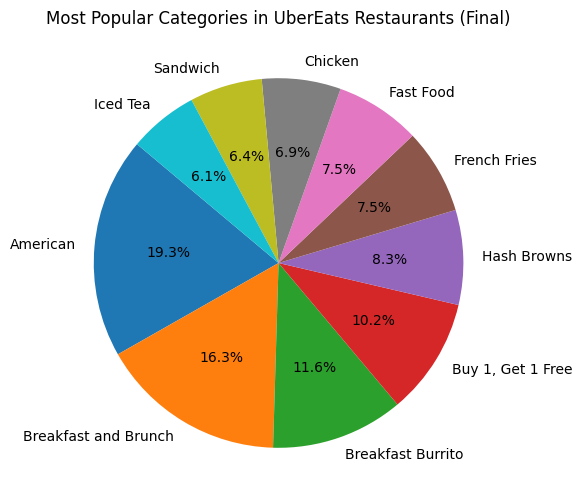

In [17]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load JSON Data
with open("ubereats_restaurants_final.json", "r", encoding="utf-8") as file:
    data = json.load(file)

df = pd.DataFrame(data)

EXCLUDE_TERMS = {
    "$", "Other fees", "Priced by add-ons", "Currently unavailable", "Earliest arrival",
    "100% (3)", "66% (3)", "Extra", "Add-ons", "Limited time", "Special", "Combo", "Meal",
    "Delivery time" 
}

def clean_categories(categories):
    filtered = []
    for cat in categories:
        if cat in EXCLUDE_TERMS:  
            continue
        if re.search(r"^\$?\d+(\.\d+)?", cat):  
            continue
        filtered.append(cat)
    return filtered

df["filtered_categories"] = df["categories and menu"].apply(clean_categories)

category_counts = pd.Series([c for sublist in df["filtered_categories"] for c in sublist]).value_counts()

category_counts = category_counts.head(10)

plt.figure(figsize=(10, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Most Popular Categories in UberEats Restaurants (Final)")
plt.ylabel("")  # Hide y-label
plt.show()


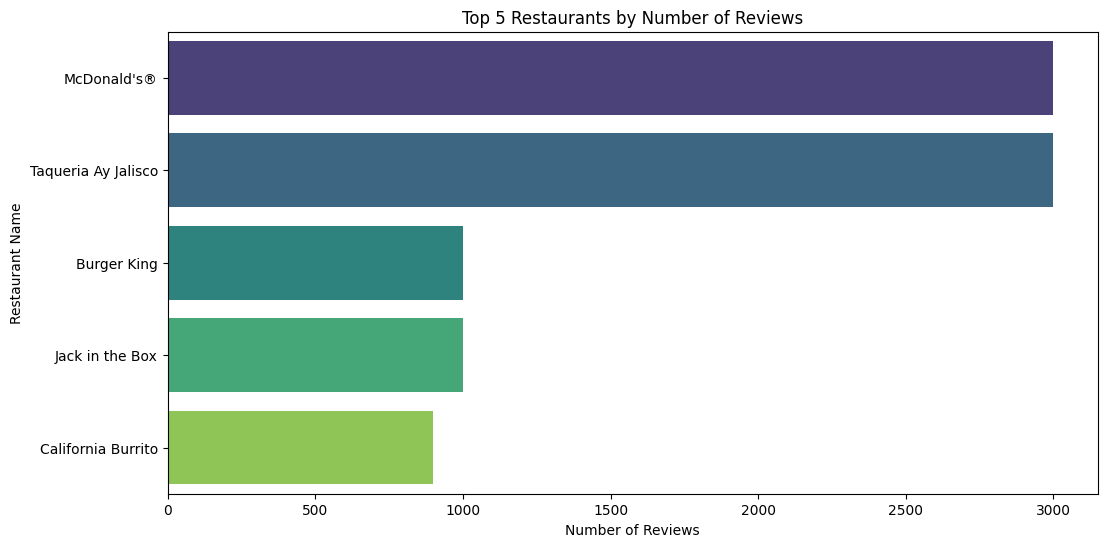

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "ubereats_restaurants_final.json"
data = pd.read_json(file_path)

data["reviews"] = data["reviews"].astype(str).str.replace(r"[(),+]", "", regex=True)
data["reviews"] = pd.to_numeric(data["reviews"], errors="coerce")  
data = data.dropna(subset=["reviews"]) 

top_restaurants = data.nlargest(10, "reviews")

plt.figure(figsize=(12, 6))
sns.barplot(y="name", x="reviews", data=top_restaurants, hue="name", palette="viridis", legend=False)
plt.xlabel("Number of Reviews")
plt.ylabel("Restaurant Name")
plt.title("Top 5 Restaurants by Number of Reviews")
plt.show()


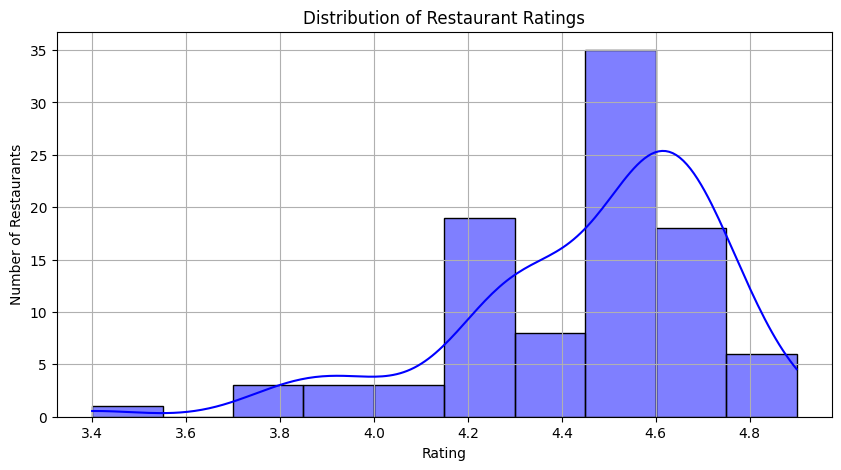

In [8]:

plt.figure(figsize=(10, 5))
sns.histplot(data["rating"], bins=10, kde=True, color="blue")
plt.xlabel("Rating")
plt.ylabel("Number of Restaurants")
plt.title("Distribution of Restaurant Ratings")
plt.grid(True)
plt.show()


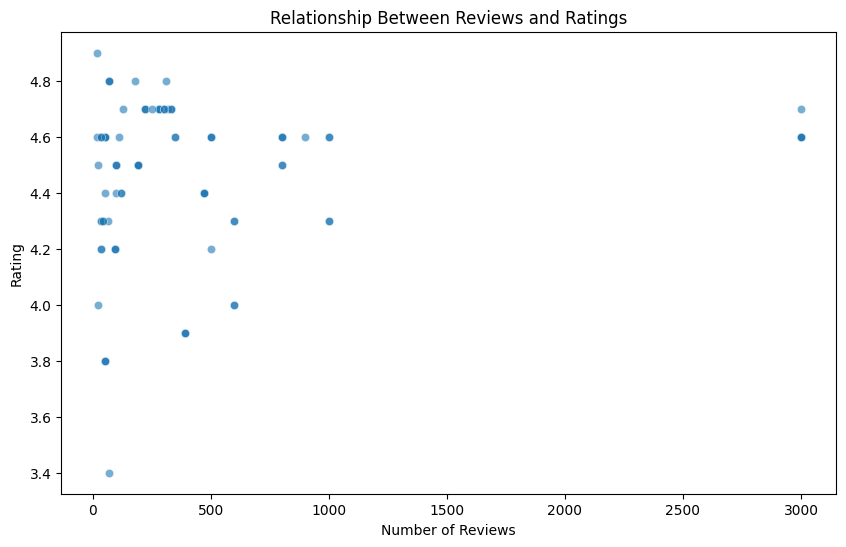

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df["reviews"] = df["reviews"].str.replace(r"[^\d]", "", regex=True)
df["reviews"] = pd.to_numeric(df["reviews"], errors='coerce')

df = df.dropna(subset=["reviews"])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["reviews"], y=df["rating"], alpha=0.6)
plt.title("Relationship Between Reviews and Ratings")
plt.xlabel("Number of Reviews")
plt.ylabel("Rating")
plt.show()


C:\Users\91998\AppData\Local\Temp\ipykernel_25532\3929442246.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ratings.values, y=avg_ratings.index, palette="coolwarm")


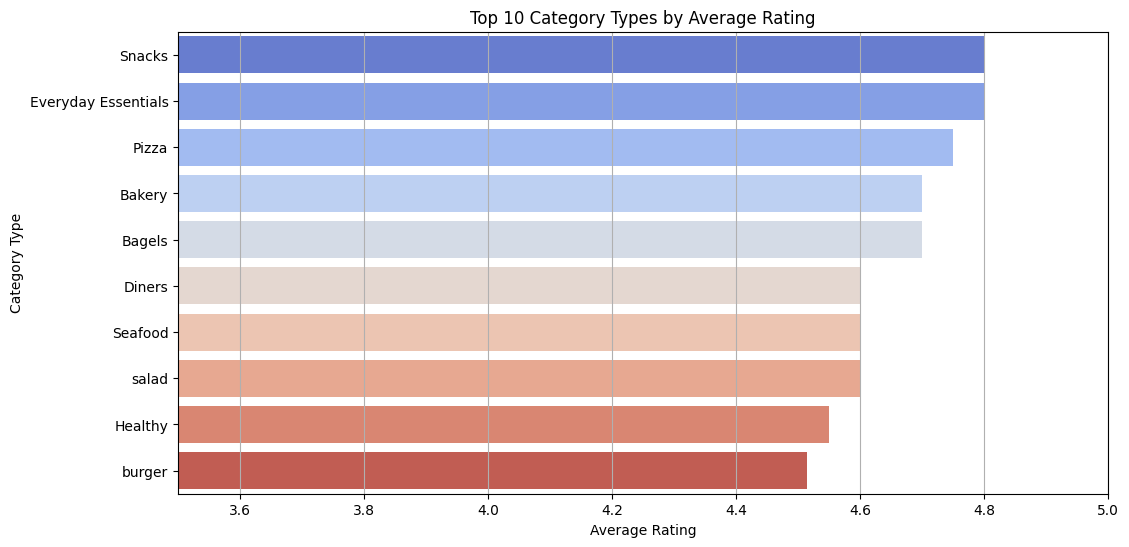

In [7]:
# Exploding the 'categories' column into separate rows
df_exploded = df.explode("categories")

# Group by cuisine type and calculate average rating
avg_ratings = df_exploded.groupby("categories")["rating"].mean().sort_values(ascending=False).head(10)

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_ratings.values, y=avg_ratings.index, palette="coolwarm")

# Titles and labels
plt.title("Top 10 Category Types by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Category Type")
plt.xlim(3.5, 5)
plt.grid(axis="x")
plt.show()


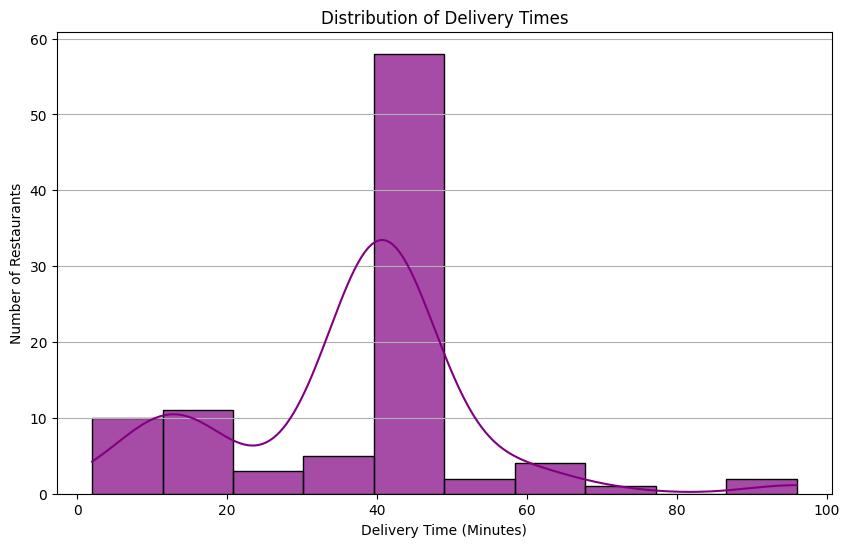

In [13]:
# Histogram of delivery times
plt.figure(figsize=(10, 6))
sns.histplot(df["delivery_time"], bins=10, kde=True, color="purple", alpha=0.7)

# Titles and labels
plt.title("Distribution of Delivery Times")
plt.xlabel("Delivery Time (Minutes)")
plt.ylabel("Number of Restaurants")
plt.grid(axis="y")
plt.show()


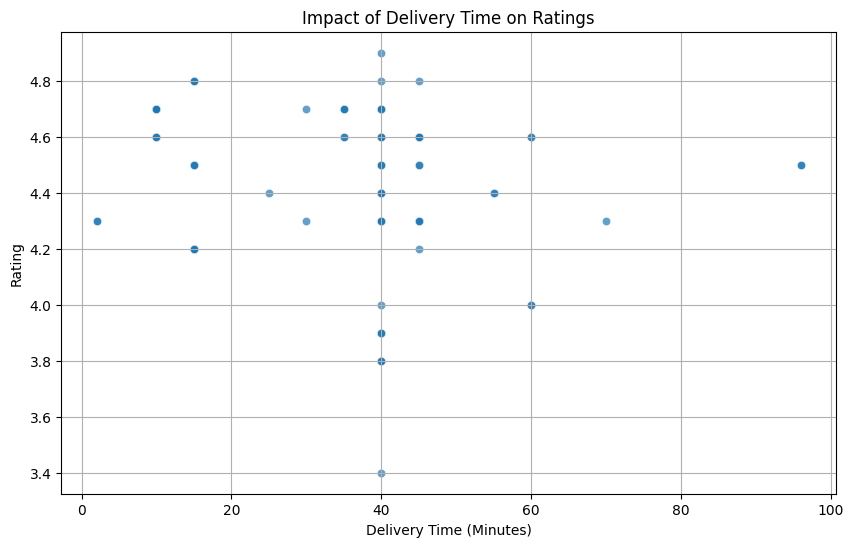

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'delivery_time' is numeric
df["delivery_time"] = pd.to_numeric(df["delivery_time"], errors="coerce")

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["delivery_time"], y=df["rating"], alpha=0.7)
plt.title("Impact of Delivery Time on Ratings")
plt.xlabel("Delivery Time (Minutes)")
plt.ylabel("Rating")
plt.grid(True)
plt.show()


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re

# Load JSON file
with open("ubereats_restaurants_final.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# List to store extracted menu details
menu_data = []

# Extract menu items, prices, and calories
for restaurant in data:
    if "categories and menu" in restaurant:
        menu_items = restaurant["categories and menu"]
        for i in range(len(menu_items) - 2):  # Ensure we have enough elements
            item_name = menu_items[i]
            price_match = re.search(r"\$\d+\.\d+", menu_items[i+1])  # Extract price
            calorie_match = re.search(r"(\d+)\s*Cal", menu_items[i+2])  # Extract calories

            if price_match:
                price = float(price_match.group().replace("$", ""))
                calories = int(calorie_match.group(1)) if calorie_match else None
                menu_data.append({"restaurant": restaurant["name"], "item": item_name, "price": price, "calories": calories})

# Convert to DataFrame
menu_df = pd.DataFrame(menu_data)

# Display first few rows of the extracted menu data
menu_df.head()



,restaurant,item,price,calories
0,McDonald's®,Sausage & Egg McMuffin®,6.79,480.0
1,McDonald's®,Hash Browns,4.19,140.0
2,McDonald's®,Sausage Egg McMuffin® Meal,11.29,790.0
3,McDonald's®,Big Breakfast® with Muffin & Hotcakes,10.29,1230.0
4,McDonald's®,Egg McMuffin®,6.89,310.0


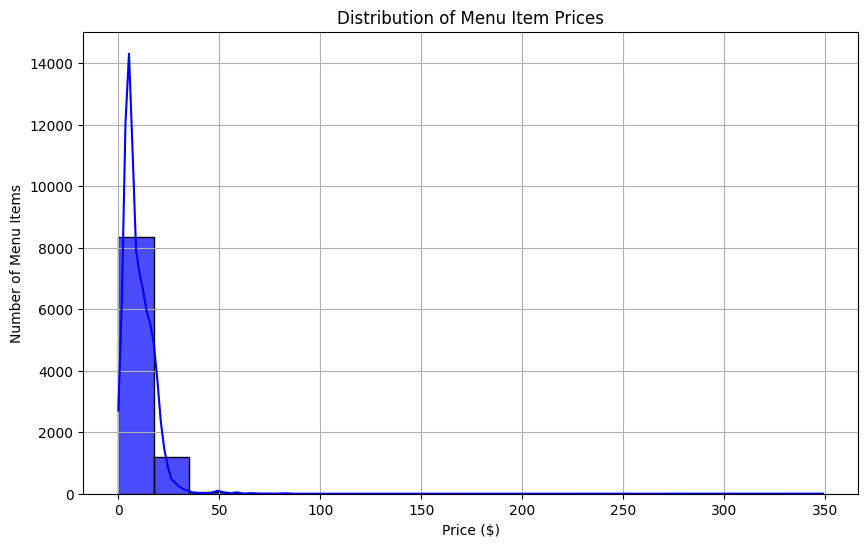

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(menu_df["price"], bins=20, kde=True, color="blue", alpha=0.7)
plt.xlabel("Price ($)")
plt.ylabel("Number of Menu Items")
plt.title("Distribution of Menu Item Prices")
plt.grid(True)
plt.show()


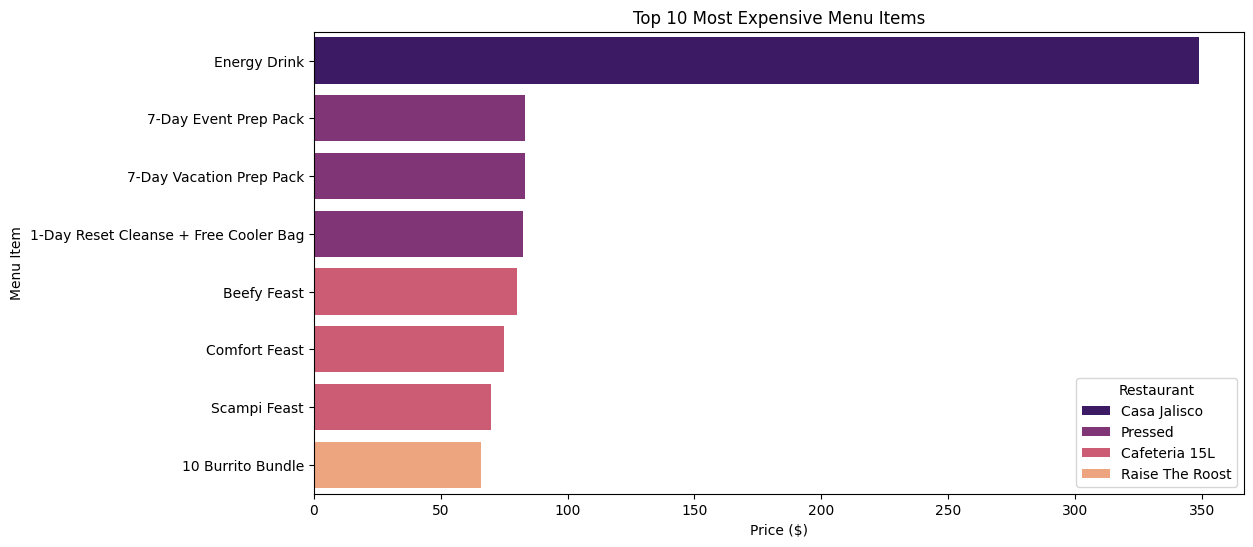

In [18]:
top_expensive = menu_df.sort_values(by="price", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_expensive["item"], x=top_expensive["price"], hue=top_expensive["restaurant"], dodge=False, palette="magma")
plt.xlabel("Price ($)")
plt.ylabel("Menu Item")
plt.title("Top 10 Most Expensive Menu Items")
plt.legend(title="Restaurant")
plt.show()


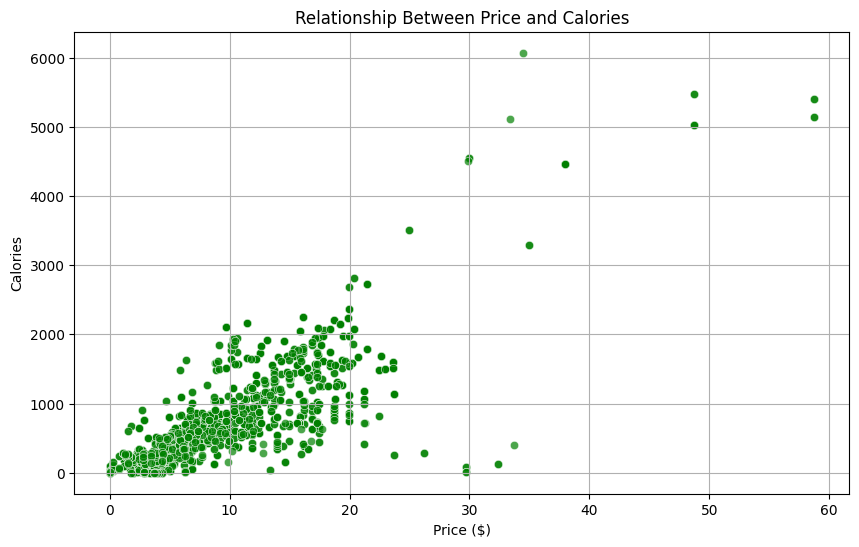

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=menu_df["price"], y=menu_df["calories"], alpha=0.7, color="green")
plt.xlabel("Price ($)")
plt.ylabel("Calories")
plt.title("Relationship Between Price and Calories")
plt.grid(True)
plt.show()


In [11]:
# Ensure the dataframe has 'restaurant' and 'price' columns
avg_price_per_restaurant = menu_df.groupby("restaurant")["price"].mean()


In [12]:
top_n = 20  # Change this as needed
top_restaurants = avg_price_per_restaurant.nlargest(top_n)


C:\Users\91998\AppData\Local\Temp\ipykernel_25532\2999096052.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_restaurants.index, x=top_restaurants.values, palette="viridis")


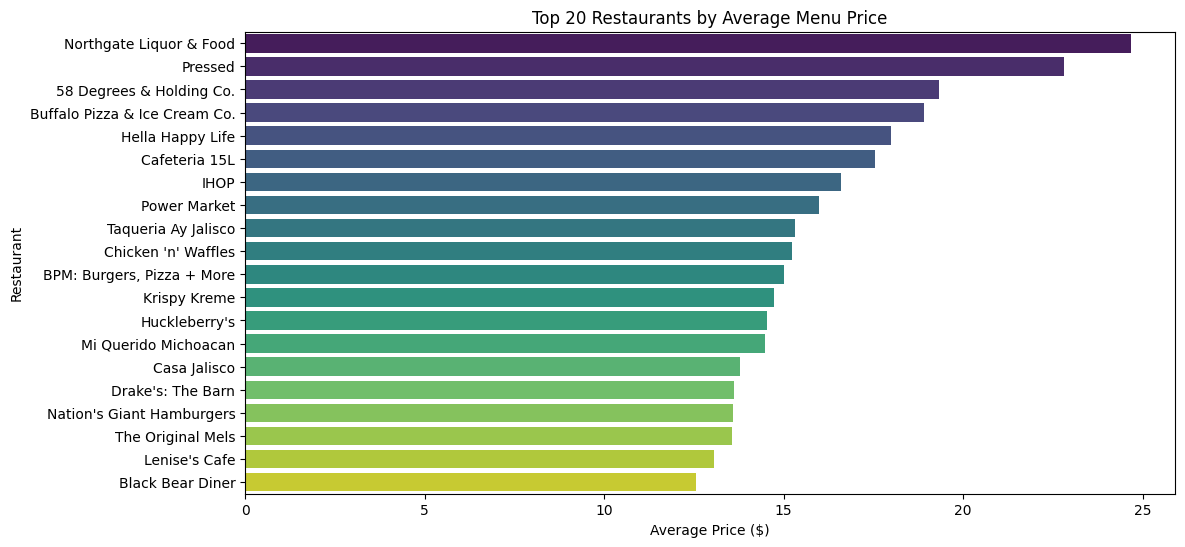

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(y=top_restaurants.index, x=top_restaurants.values, palette="viridis")
plt.xlabel("Average Price ($)")
plt.ylabel("Restaurant")
plt.title(f"Top {top_n} Restaurants by Average Menu Price")
plt.show()
